In [2]:
%run ../draw_functions.py
%run ../kstest.py

In [3]:
from draw_functions import *
from kstest import *

In [4]:
#read csv
df = pd.read_csv('../csv/MX124061115FQ01.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
0,045C4358-59E5-4411-B956-0006E67BFE00,0.010000,0.858686,153201B,O5A18L090,NaN
1,045C4358-59E5-4411-B956-0006E67BFE00,0.020000,1.841656,153201B,O5A18L090,98.296954
2,045C4358-59E5-4411-B956-0006E67BFE00,0.039600,1.775220,153201B,O5A18L090,-3.389550
3,045C4358-59E5-4411-B956-0006E67BFE00,0.060000,1.728671,153201B,O5A18L090,-2.281854
4,045C4358-59E5-4411-B956-0006E67BFE00,0.079200,1.728671,153201B,O5A18L090,0.000000
...,...,...,...,...,...,...
833,D0CA3430-80C1-4D09-905D-FCC4918485AA,0.918467,26.303210,153201B,O5A18L07A,4.228921
834,D0CA3430-80C1-4D09-905D-FCC4918485AA,0.938333,26.370700,153201B,O5A18L07A,3.397133
835,D0CA3430-80C1-4D09-905D-FCC4918485AA,0.958400,26.404671,153201B,O5A18L07A,1.692898
836,D0CA3430-80C1-4D09-905D-FCC4918485AA,0.978333,26.449790,153201B,O5A18L07A,2.263479


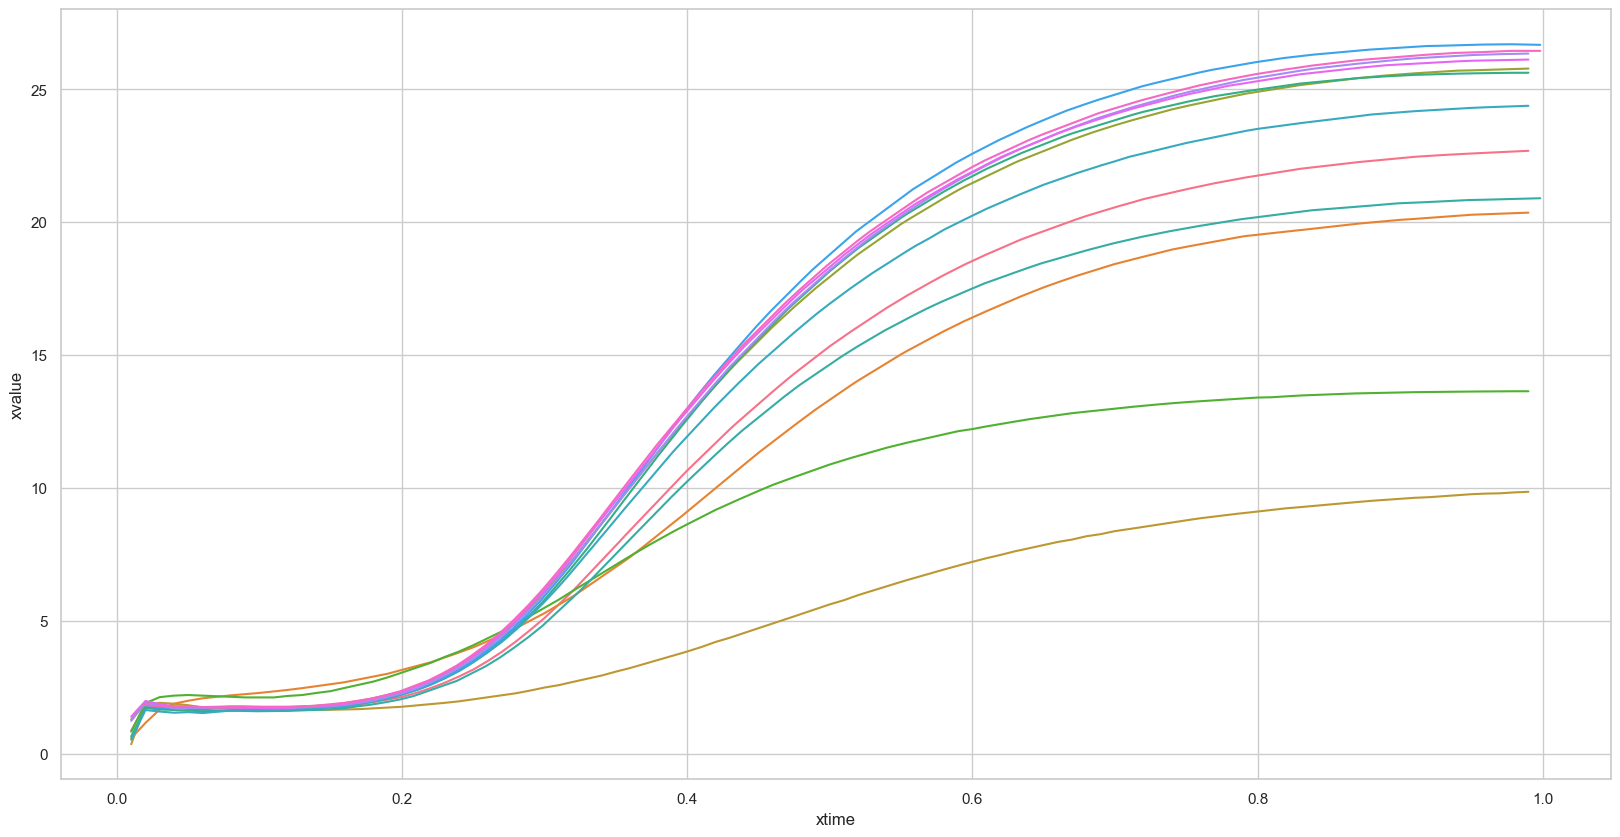

In [4]:
dessiner_commande(df)

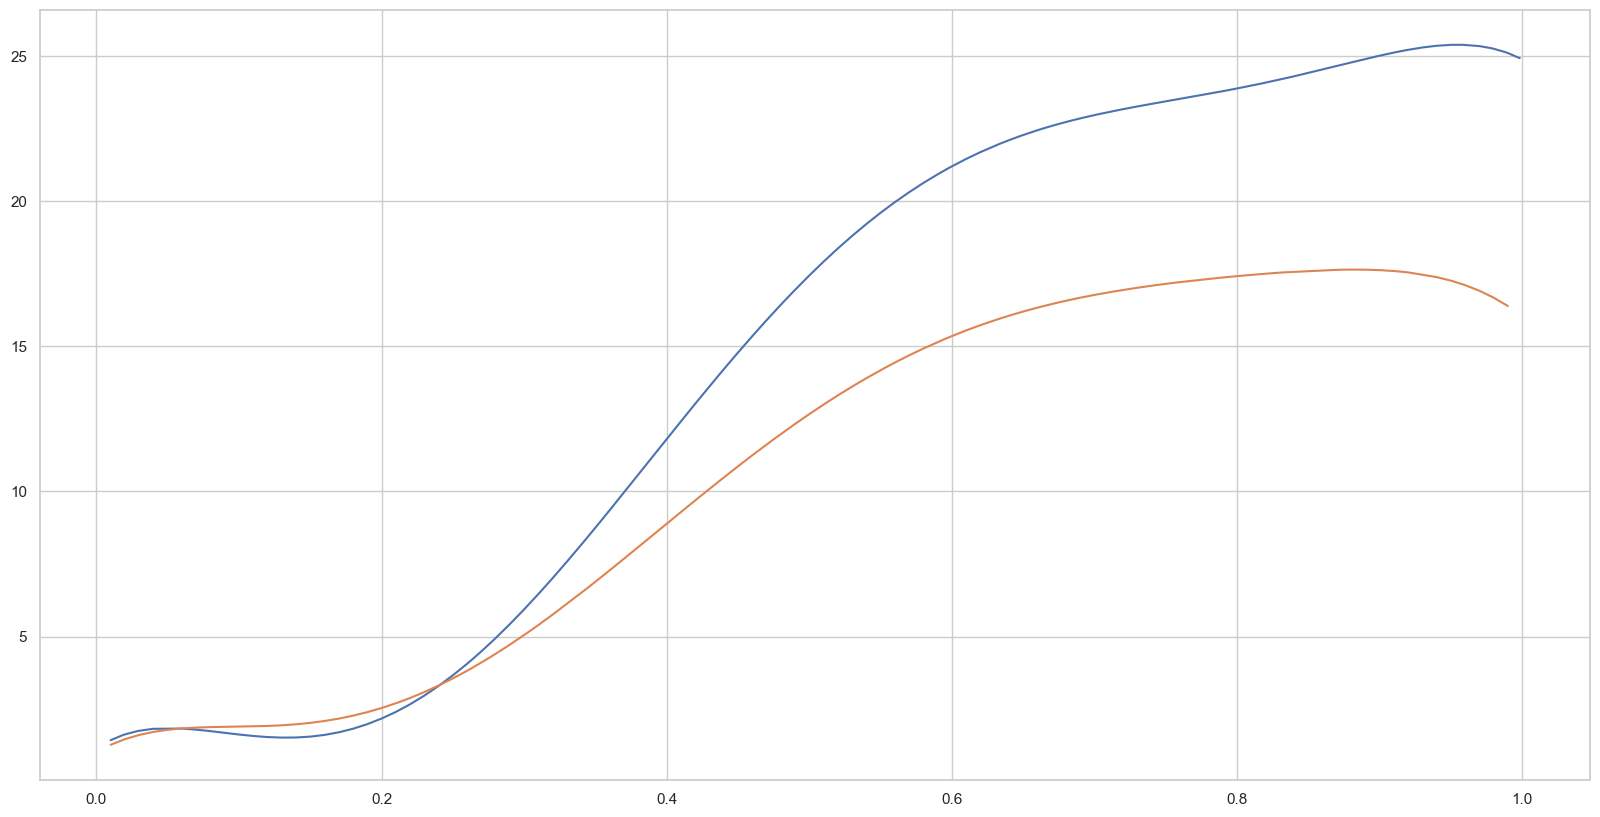

In [5]:
dessiner_commande(df,degree=6)

## Analyse des pentes

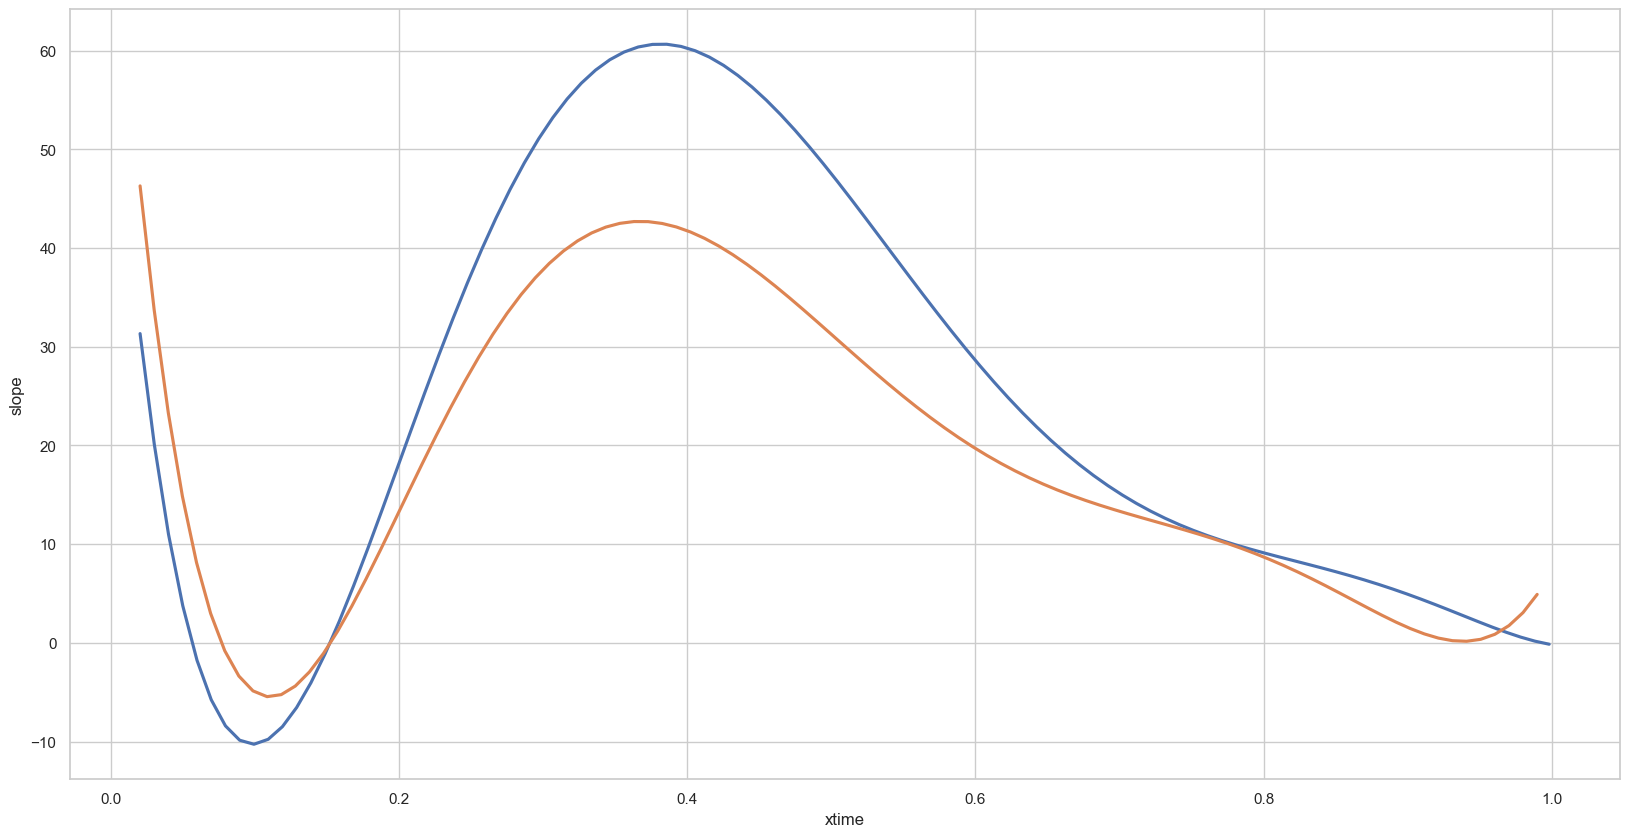

In [11]:
dessiner_commande_slope(df, 6 ,unified=True)

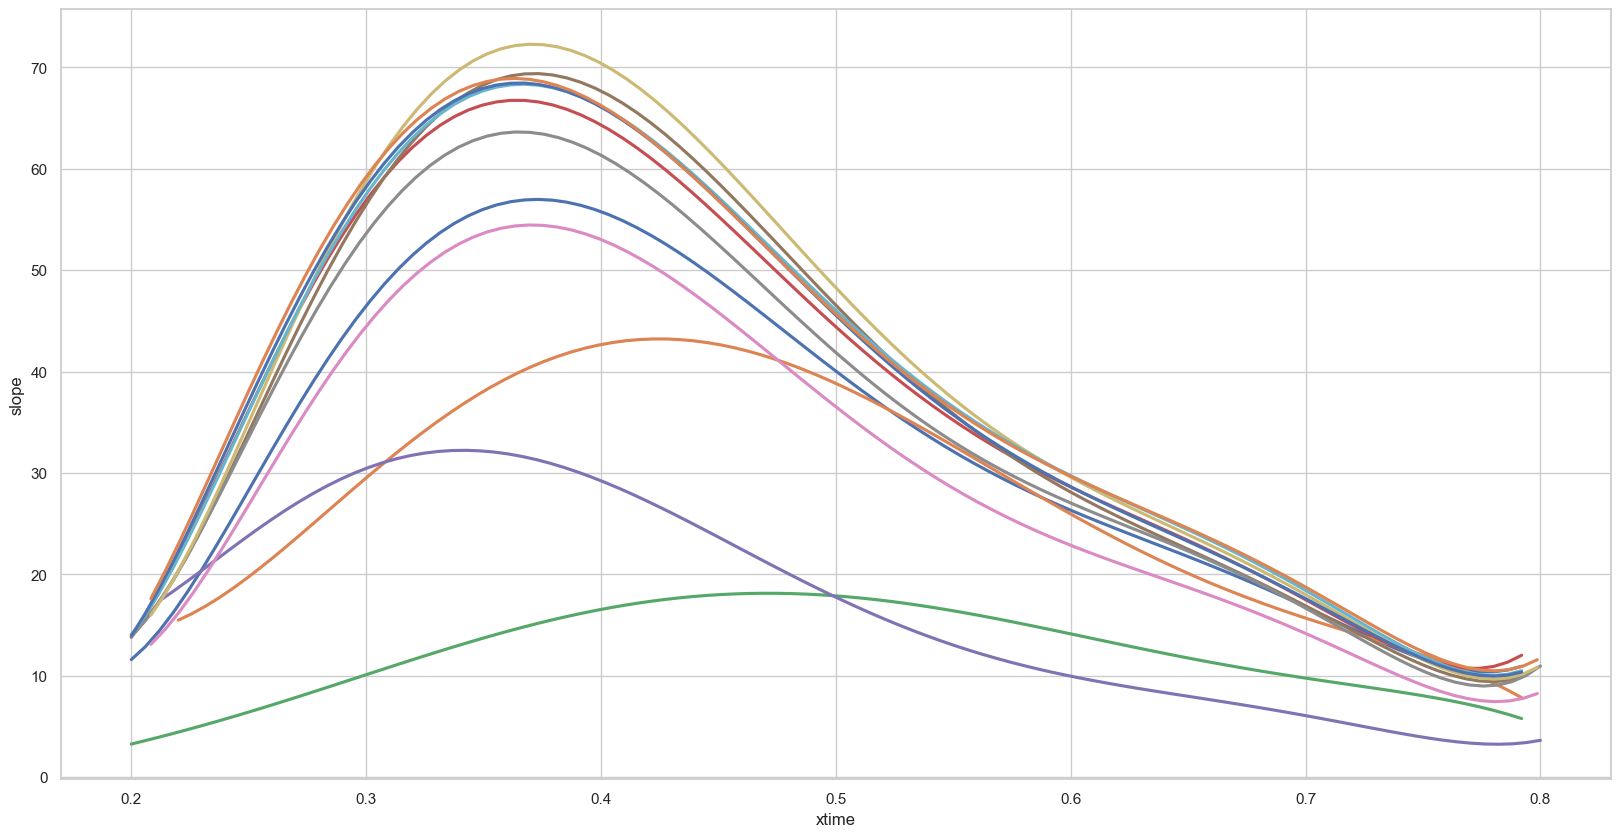

In [5]:
dessiner_commande_slope(df_02_08, 6 ,unified=False)

- Batch 153201B: 38.64217392341359
- Batch 153802B: 38.64217392341359


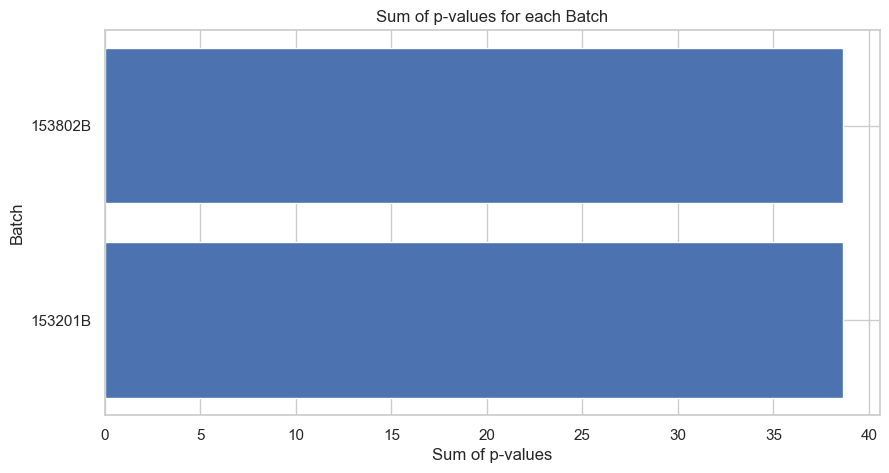

In [8]:
batch_pvalues = ks_test_slope(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

- Batch 153201B: 62.80158921026803
- Batch 153802B: 62.80158921026803


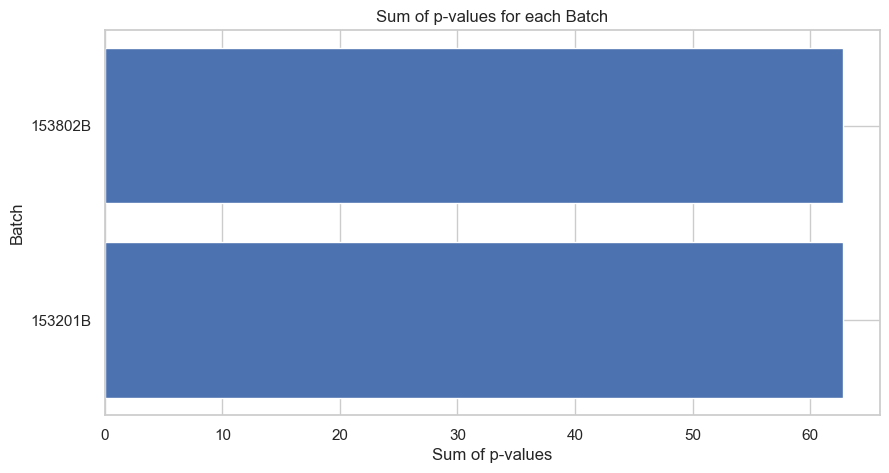

In [9]:
batch_pvalues = ks_test_value(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

In [11]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_xtime = df_02_08.loc[df_02_08.groupby('Batch')['slope'].idxmax()]['xtime']

# Calculer la différence entre le max et le min des xtime
max_diff = max_slope_xtime.max() - max_slope_xtime.min()

print("La plus grande différence de temps entre les max des pentes des différentes batch est :", round(max_diff*60,3), "secondes")

La plus grande différence de temps entre les max des pentes des différentes batch est : 0.18 secondes


In [7]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_batch_xtime = max_slope_sample_xtime.groupby('Batch').median()

# Calculer la médiane de xtime pour chaque groupe
median_xtime = max_slope_sample_xtime.median()

# Calculer la différence entre le xtime du max de la pente et la médiane de xtime pour chaque groupe
diff = max_slope_batch_xtime - median_xtime

# Sort the differences by their absolute values in descending order
diff_sorted = diff.abs().sort_values(ascending=False)

# Print the differences in the sorted order
for batch in diff_sorted.index:
    print(f"La différence de temps entre le max de la pente et la médiane pour le batch {batch} est : {round(diff_sorted[batch]*60,3)} seconde")

La différence de temps entre le max de la pente et la médiane pour le batch 153201B est : 0.0 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 153802B est : 0.0 seconde


In [8]:
round(np.std(max_slope_sample_xtime)*1000,2)

50.08